# 購買量與甚麼因素有關?

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
df_order = pd.read_csv("C:\\Users\\Tsai Jessica\\NTU\\CSX4001_DataScience_Spring2019\\91APP\\Datasets\\Orders.csv", low_memory=False)
df_order.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [13]:
#查看類別型態
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 28 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [14]:
#轉換日期變數型態
df_order['newDateID'] = pd.to_datetime(df_order['DateId'].astype(str), format='%Y%m%d')
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495276 entries, 0 to 5495275
Data columns (total 29 columns):
DateId                         int64
MemberId                       int64
OrderGroupCode                 object
TrackSourceTypeDef             object
TrackDeviceTypeDef             object
PayProfileTypeDef              object
SalesOrderSlaveId              int64
SalePageId                     int64
IsMajor                        bool
IsGift                         bool
IsSalePageGift                 bool
Quantity                       int64
UnitPrice                      float64
PromotionDiscount              float64
ECouponId                      int64
ECouponDiscount                float64
SalesOrderSlaveTotalPayment    float64
SalesOrderSlaveDateTime        object
SalesOrderReceiverId           int64
City                           object
District                       object
ZipCode                        float64
StoreName                      object
StoreId              

In [15]:
df_order.head()

,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef,newDateID
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,嘉義縣,水上鄉,608.0,中庄門市,910828,SevenEleven,Finish,NaN,NaN,2015-07-03
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,桃園市,中壢區,320.0,復華門市,114071,SevenEleven,Finish,NaN,NaN,2015-07-03


1. 時間因素

In [16]:
#建立每日出貨量表格
dailyquantity = df_order.groupby(by='newDateID')['Quantity'].sum()
dailyquantity.head()

newDateID
2015-05-06     26
2015-05-07     38
2015-05-08     61
2015-05-09     87
2015-05-10    103
Name: Quantity, dtype: int64

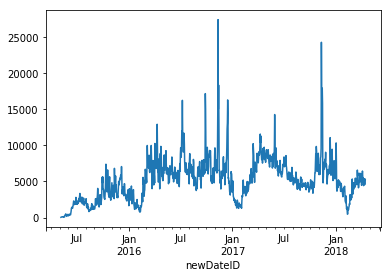

In [17]:
%matplotlib inline
dailyquantity.plot()  # 會默認第一個變數是 X 軸，第二個變數是 Y 軸。

從上圖可以發現購買量在下半年度有許多明顯的高峰值，而且與節日的關聯性極高，尤其是聖誕節更是創造驚人的購買量；上半年度尤其是過年前後的買氣甚是低迷。

2. 折扣活動因素

In [18]:
df_proorder = pd.read_csv("C:\\Users\\Tsai Jessica\\NTU\\CSX4001_DataScience_Spring2019\\91APP\\Datasets\\PromotionOrders.csv", low_memory=False)
df_proorder.head()

,SalesOrderSlaveId,PromotionId,SalesOrderSlavePromotionDiscount,SalesOrderSlavePromotionDiscountAllocated,SalesOrderSlavePromotionDiscountAllocatedQty,SalesOrderSlavePromotionDiscountRate,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
0,40086585,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
1,40088089,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
2,40090756,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
3,40090763,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
4,40091003,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000


<BarContainer object of 7 artists>

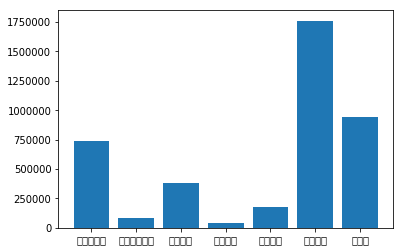

In [19]:
distypequant = df_proorder.groupby(by='DiscountType')['SalesOrderSlavePromotionDiscountAllocatedQty'].sum()
x = ["任選優惠價", "會員滿額打折", "滿件打折", "滿件折現", "滿額打折", "滿額折現", "滿額贈"]
plt.bar(x, distypequant)

從上圖可以發現兩種有關滿額的折扣活動也創造較高的購買量

3. 折價卷因素

In [20]:
ecoupquan = df_order.groupby(by='ECouponId')['Quantity'].sum()
ecoupquan

ECouponId
0        3892857
3046          39
3086         270
3111         546
3225         349
3280         681
3345         426
3444         551
3613        1650
3614        1569
3767        2711
3916        5303
4068        1068
4180        3257
4315        2712
4448        2533
4594        3941
4737        2547
4879        2130
5170        4211
5183         764
5184         446
5185        1163
5186         876
5187         785
5188        1012
5189        1036
5190         965
5441        5076
5577        3914
          ...   
57511       4603
57512       2814
57974       2642
57975        884
57976       1020
57977       4716
58993        719
59001       2071
59002       8371
59006       6090
62698       4649
62704       4463
62713       2905
62714       5554
63750       4658
63752      23047
63756        162
65569        197
65570        417
65573        376
65574        553
65575        407
65576        534
67943        383
67949       2495
67950       9414
67951      15652
6795

<BarContainer object of 245 artists>

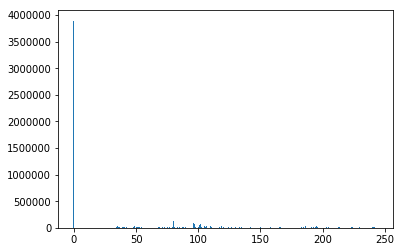

In [21]:
plt.bar(range(245), ecoupquan)

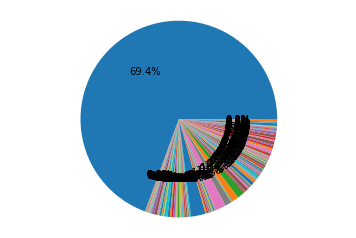

In [22]:
plt.pie(ecoupquan, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

從上圖中可知高達70%的客戶購買時並未使用折價卷，可能原因為折價券難以取得，又或者是期限太短來不及使用，整體來說可知折價卷難以提升客戶的購買行動